In [12]:
print('start')

start


# import

In [13]:
import pandas as pd
import numpy as np

from hdfs import InsecureClient

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import folium

# Hadoop Data Loading

In [97]:
fs = InsecureClient('http://bdata.iptime.org:9999/', user='hadoop')
fs_path, file_name = '/user/hadoop/sports', '인구_십만명당_체육시설수_시도__20250109115945.csv'
with fs.read(f'{fs_path}/{file_name}', encoding='utf-8') as reader:
    data = pd.read_csv(reader)

data.tail()

,시점,행정구역별(1),인구십만명당 체육시설수<br>(A÷B×100000) (개),체육시설수<br>(A) (개)
261,2022,전북특별자치도,123.4,2183
262,2022,전라남도,124.7,2267
263,2022,경상북도,118.8,3090
264,2022,경상남도,111.7,3663
265,2022,제주특별자치도,150.7,1022


# Data Structuring

In [10]:
data.rename(columns={'시점':'year', '행정구역별(1)':'region', '인구십만명당 체육시설수<br>(A÷B×100000) (개)':'per100td','체육시설수<br>(A) (개)':'count'}, inplace=True)
data.columns

Index(['year', 'region', 'per100td', 'count'], dtype='object')

In [86]:
data_f = data.copy()
data_f = data_f[data_f['region'] == '전국']
data_f = data_f[data_f['year'] >= 2015]
del data_f['region']
data_f.head()

,year,per100td,count
122,2015,108.4,55857
140,2016,112.8,58321
158,2017,113.7,58884
176,2018,109.7,56854
194,2019,102.1,52960


# Data Graphics

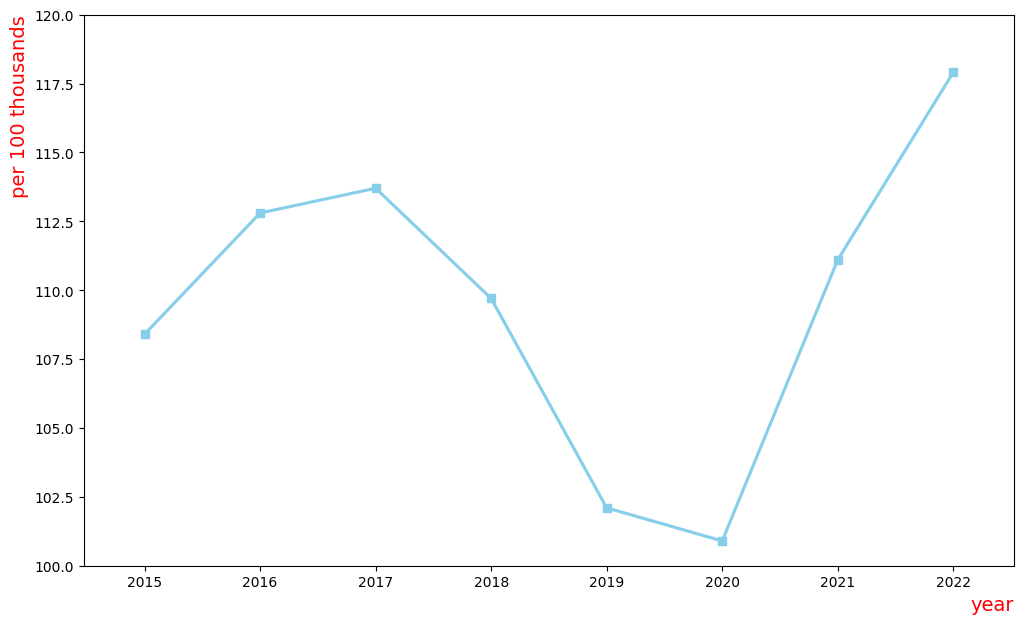

In [96]:
years = list(data_f['year'].drop_duplicates())

fig, ax = plt.subplots(figsize=(12, 8))
fontdict = {'size': 14, 'color': 'red'}

ax.plot(data_f['year'], data_f['per100td'], linewidth=2.25, color='skyblue', marker='s')
ax.set_facecolor('#fff')
ax.set_box_aspect(16/27)
ax.set_xlabel('year', loc='right', fontdict=fontdict)
ax.set_ylabel('per 100 thousands', loc='top', fontdict=fontdict)
ax.set_ylim([100, 120])
ax.set_xmargin(0.075)
plt.savefig('../resultData/faci_count.png')
plt.show()